In [9]:
import numpy as np
import pandas as pd
import time as time
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [239]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("letter-recognition.data")
feature = pd.get_dummies(df)
display(feature.head(5))

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,lettr_Q,lettr_R,lettr_S,lettr_T,lettr_U,lettr_V,lettr_W,lettr_X,lettr_Y,lettr_Z
0,2,8,3,5,1,8,13,0,6,6,...,0,0,0,1,0,0,0,0,0,0
1,5,12,3,7,2,10,5,5,4,13,...,0,0,0,0,0,0,0,0,0,0
2,4,11,6,8,6,10,6,2,6,10,...,0,0,0,0,0,0,0,0,0,0
3,7,11,6,6,3,5,9,4,6,4,...,0,0,0,0,0,0,0,0,0,0
4,2,1,3,1,1,8,6,6,6,6,...,0,0,0,0,0,0,0,0,0,0


In [4]:
encoded = list(feature.columns)
print("{} after encoding.".format(len(encoded)))
print(encoded)

42 after encoding.
['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx', 'lettr_A', 'lettr_B', 'lettr_C', 'lettr_D', 'lettr_E', 'lettr_F', 'lettr_G', 'lettr_H', 'lettr_I', 'lettr_J', 'lettr_K', 'lettr_L', 'lettr_M', 'lettr_N', 'lettr_O', 'lettr_P', 'lettr_Q', 'lettr_R', 'lettr_S', 'lettr_T', 'lettr_U', 'lettr_V', 'lettr_W', 'lettr_X', 'lettr_Y', 'lettr_Z']


In [253]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['lettr'] = le.fit_transform(df['lettr'])
display(df.head())

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [264]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
y = df.lettr
x = df.drop('lettr', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
dectree = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)
dectree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

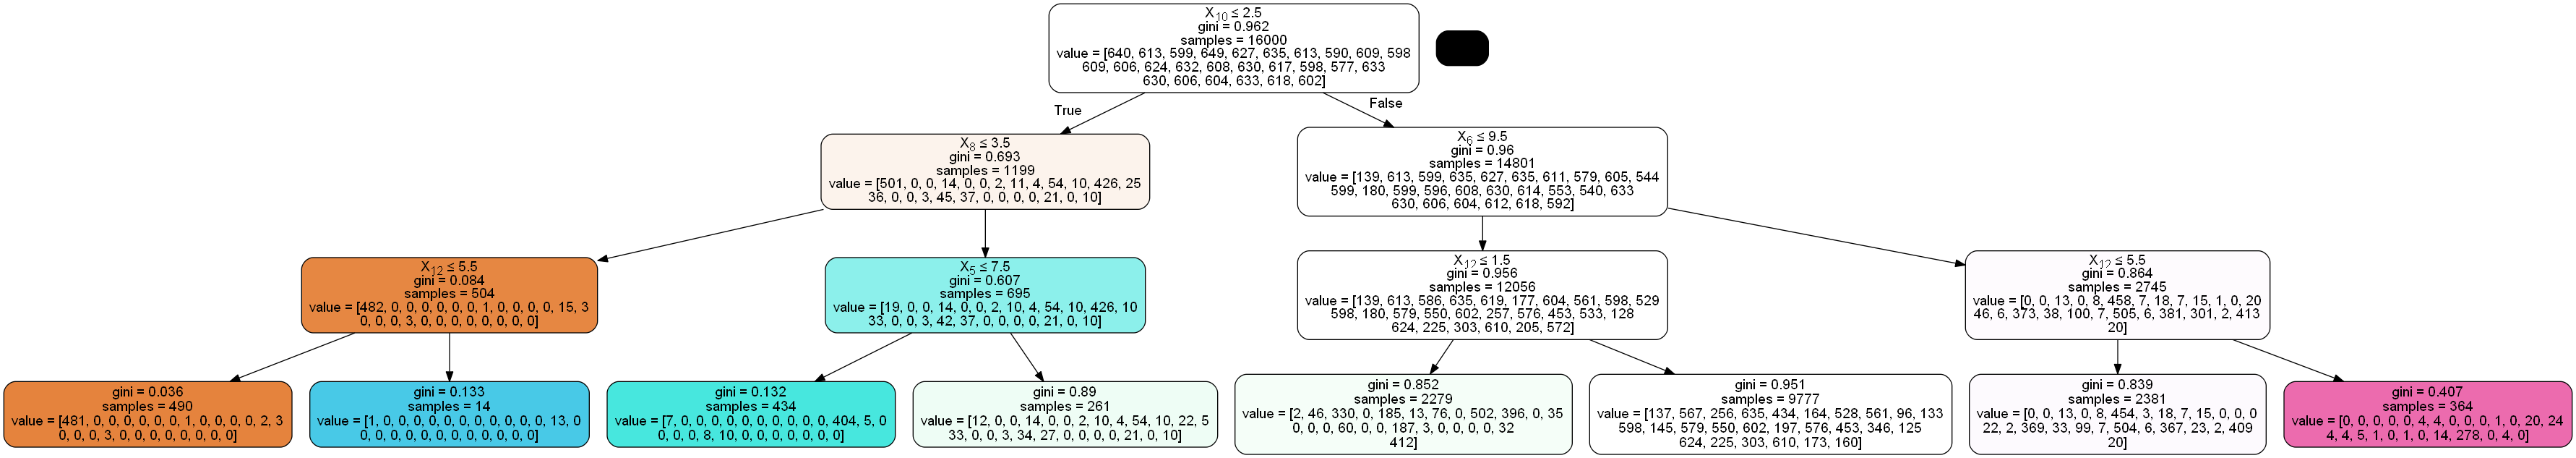

In [227]:
import pydotplus
dot = tree.export_graphviz(dectree,out_file=None, filled = True, rounded = True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot)
from IPython.display import Image
Image(graph.create_png())

In [228]:
y_pred_class = dectree.predict(x_test)
y_pred_class

array([ 3,  3,  0, ...,  3, 19, 19])

In [179]:
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [19 11  0  4 16  4 14 16  6 14  1 15 21 16 12 21  1 10 18  3  1 15 16 14
 22]
False: [ 3  3  0  3  3  8  3  3  3  3  3 19 19  3  3 19  3  3  3  3  3  3 19  3
 22]


In [231]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)


[[117   0   0  27   0   0   0   0   0   4   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 145   0   0   0   0   7   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0  64   0   0   0   0   0   0   0   0   0
    0   5   0   0   0   0   0   0]
 [  0   0   0 152   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   0   0]
 [  0   0   0  90   0   0   0   0  49   0   0   0   0   0   0   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   0  42   0   0   0   0   4   0   0   0   0   0   0   0   0   0
    0  94   0   0   0   0   0   0]
 [  1   0   0 135   0   0   0   0  19   1   0   0   0   0   0   0   0   0
    0   0   0   0   4   0   0   0]
 [  0   0   0 135   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   6   0   0   0   0   0   0]
 [  0   0   0  24   0   0   0   0 118   2   0   0   0   0   0   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   0   0  35  

In [232]:
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_class, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

Predicted  0   3   8   9   11  12  19  22
Actual                                   
0           2  18   2   0   0   1   7   2
1           0  16   6   1   0   0   9   1
2           0  18   4   1   1   0   4   1
3           2  20   8   2   0   0   4   0
4           0   8   3   3   1   0   4   0
5           0  17   3   0   1   0   0   1
6           0  23   4   1   0   0   4   0
7           0  22   5   0   1   0   6   0
8           3  18   3   0   1   0   8   0
9           2  17   3   0   0   0   7   1
10          1  12   4   1   0   0   4   1
11          1  22   5   2   0   0   6   1
12          1  20   1   0   0   0   7   1
13          1  18   6   0   1   0   6   2
14          0  15   6   0   1   0   4   0
15          0  20   7   1   0   0   5   1
16          1  21   2   0   0   0   3   1
17          0  16   3   0   0   0   2   0
18          0  23   7   0   0   0   9   0
19          1  16   6   0   3   0   7   0
20          2  20   7   0   1   0   9   1
21          1  13   4   0   1   0 

In [149]:
print(y_pred_class)

[20 20  0 ...  8 20 20]


In [208]:
import warnings
warnings.filterwarnings('always')
from sklearn.metrics import classification_report
metrics.f1_score(y_test, y_pred_class, average='weighted', labels=np.unique(y_pred_class))

0.38942148230951745

In [242]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test, target_names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']))

Accuracy: 0.9465
              precision    recall  f1-score   support

           A       1.00      0.97      0.98       154
           B       0.97      0.86      0.91       173
           C       0.93      0.97      0.95       131
           D       0.97      0.83      0.90       183
           E       0.94      0.96      0.95       139
           F       0.94      0.86      0.90       152
           G       0.96      0.94      0.95       162
           H       0.80      0.88      0.84       130
           I       0.95      0.97      0.96       143
           J       0.95      0.95      0.95       148
           K       0.88      0.93      0.90       123
           L       0.97      0.97      0.97       154
           M       0.98      0.99      0.98       166
           N       0.92      0.98      0.95       142
           O       0.96      0.94      0.95       148
           P       0.86      0.99      0.92       151
           Q       0.96      0.98      0.97       163
          

In [210]:
dectree.predict(x_test)[0:10]

array(['D', 'D', 'A', 'D', 'D', 'I', 'D', 'D', 'D', 'D'], dtype=object)

In [211]:
dectree.predict_proba(x_test)[0:10]

array([[1.40124783e-02, 5.79932495e-02, 2.61839010e-02, 6.49483482e-02,
        4.43898947e-02, 1.67740616e-02, 5.40042958e-02, 5.73795643e-02,
        9.81896287e-03, 1.36033548e-02, 6.11639562e-02, 1.48307252e-02,
        5.92206198e-02, 5.62544748e-02, 6.15730797e-02, 2.01493301e-02,
        5.89137772e-02, 4.63332311e-02, 3.53891787e-02, 1.27851079e-02,
        6.38232587e-02, 2.30131942e-02, 3.09911016e-02, 6.23913266e-02,
        1.76945893e-02, 1.63649381e-02],
       [1.40124783e-02, 5.79932495e-02, 2.61839010e-02, 6.49483482e-02,
        4.43898947e-02, 1.67740616e-02, 5.40042958e-02, 5.73795643e-02,
        9.81896287e-03, 1.36033548e-02, 6.11639562e-02, 1.48307252e-02,
        5.92206198e-02, 5.62544748e-02, 6.15730797e-02, 2.01493301e-02,
        5.89137772e-02, 4.63332311e-02, 3.53891787e-02, 1.27851079e-02,
        6.38232587e-02, 2.30131942e-02, 3.09911016e-02, 6.23913266e-02,
        1.76945893e-02, 1.63649381e-02],
       [9.81632653e-01, 0.00000000e+00, 0.00000000e+00

In [158]:
y_pred_prob = dectree.predict_proba(x_test)[:, 1]

In [159]:
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

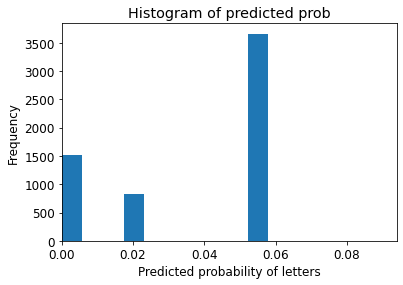

In [212]:
import matplotlib.pyplot as plt
plt.hist(y_pred_prob, bins=10)
plt.xlim(0,9.39168030e-02)
plt.title('Histogram of predicted prob')
plt.xlabel('Predicted probability of letters')
plt.ylabel('Frequency')

In [243]:
from sklearn.metrics import fbeta_score
predictions_test = dectree.predict(x_test)
fbeta_score(predictions_test, y_test, average='weighted', beta=0.5)

0.361366170061541

In [261]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=8)

In [262]:
y_pred = classifier.predict(x_test)
y_pred

array([19, 11,  0, ..., 16, 24, 24])

In [263]:
print("Confusion Matrix: \n", metrics.confusion_matrix(y_pred, y_test))
print("Accuracy: \n", metrics.accuracy_score(y_test, y_pred)*100)
print("Precision: \n", metrics.precision_score(y_test, y_pred, average='weighted')*100)
print("Recall: \n", metrics.recall_score(y_test, y_pred, average='weighted')*100)

Confusion Matrix: 
 [[149   1   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   1   0   0   0   2   0]
 [  0 148   0   1   0   1   1   8   0   0   1   0   2   0   0   1   0   6
    1   0   0   3   0   0   0   0]
 [  0   0 127   0   2   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   1   0 152   0   2   2   8   0   0   2   0   0   4   5   2   1   1
    1   0   1   0   0   1   0   0]
 [  0   0   1   0 133   1   1   0   0   0   0   1   0   0   0   0   0   0
    1   0   0   0   0   1   0   0]
 [  0   0   0   0   0 131   0   0   1   0   0   0   0   0   0  17   0   1
    0   0   0   2   0   0   0   0]
 [  0   0   2   0   2   0 153   1   0   0   0   3   0   0   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   1   0 115   0   0   6   0   0   1   0   0   0   3
    0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 138   5   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]

In [233]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train.values.ravel())

SVC()

In [249]:
svc_pred = svc.predict(x_test)
svc_pred

array([23, 11,  0, ..., 16, 24, 24])

In [260]:
print("Confusion Matrix: \n", metrics.confusion_matrix(svc_pred, y_test))
print("Accuracy: \n", metrics.accuracy_score(y_test, svc_pred)*100)
print("Precision: \n", metrics.precision_score(y_test, svc_pred, average='weighted')*100)
print("Recall: \n", metrics.recall_score(y_test, svc_pred, average='weighted')*100)

Confusion Matrix: 
 [[144   0   0   0   0   0   1   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   1   0   0   1   1]
 [  0 143   0   1   3   2   0   4   0   0   0   0   2   0   0   1   3   5
    2   1   0   5   0   1   0   0]
 [  1   0 123   0   1   0   1   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   5   0 153   0   0   4   8   1   1   2   0   0   3   4   0   1   2
    0   0   0   0   0   2   1   0]
 [  0   0   2   0 130   1   0   0   0   1   0   4   0   0   0   0   3   0
    1   1   0   0   0   0   0   0]
 [  0   1   0   0   0 134   0   0   2   1   0   0   0   0   0  14   0   0
    0   0   0   1   0   0   0   0]
 [  1   0   3   0   5   0 149   0   0   0   0   3   0   0   0   8   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   1   2   0   0   0 106   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0 134   3   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]